In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

from datetime import datetime, tzinfo
import pytz

In [4]:
space_race = pd.read_csv("Space_Corrected.csv")
space_race.head(10)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success
6,6,6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
9,9,9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success


In [5]:
space_race.info()


space_race.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


(4324, 9)

In [6]:
space_race = space_race.iloc[:,2:len(space_race.columns)]

In [7]:
pd.set_option('display.max_columns', None)
space_race.sample(5)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
1366,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Tue Sep 23, 1997 23:58 UTC",Ariane 44LP | Intelsat 803,StatusRetired,NaN,Success
2302,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Oct 30, 1982",Titan 34D | DSCS-II-15 + DSCS-III-A1,StatusRetired,NaN,Success
2500,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia","Tue Aug 28, 1979 00:55 UTC",Cosmos-3M (11K65M) | Cosmos 1125,StatusRetired,NaN,Success
2262,ESA,"ELV-1 (SLV), Guiana Space Centre, French Guian...","Thu Jun 16, 1983 11:59 UTC",Ariane 1 | ECS 1 & Oscar-10,StatusRetired,NaN,Success
4275,US Air Force,"SLC-1W (75-3-4), Vandenberg AFB, California, USA","Sat Nov 07, 1959 20:28 UTC",Thor-DM18 Agena-A | Discoverer 7,StatusRetired,NaN,Success


In [8]:
space_race.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [9]:
stats=pd.DataFrame(space_race.describe().T)
stats

,count,unique,top,freq
Company Name,4324,56,RVSN USSR,1777
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
Datum,4324,4319,"Wed Nov 05, 2008 00:15 UTC",2
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Status Rocket,4324,2,StatusRetired,3534
Rocket,964,56,450.0,136
Status Mission,4324,4,Success,3879


In [10]:
space_race['Country'] = space_race.Location.apply(lambda x:x.split(',')[-1])
space_race.sample(5)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
942,CASC,"Site 901 (SLS-1), Jiuquan Satellite Launch Cen...","Sun Oct 16, 2005 20:32 UTC",Long March 2F | Shenzhou 6,StatusActive,NaN,Success,China
2782,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Sep 03, 1976 09:20 UTC",Soyuz U | Cosmos 854,StatusRetired,NaN,Success,Russia
1113,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA","Wed Jan 16, 2002 00:30 UTC",Titan IV(401)B | Milstar DFS-5,StatusRetired,NaN,Success,USA
706,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA","Sun Nov 21, 2010 22:58 UTC",Delta IV Heavy | NROL-32,StatusActive,350.0,Success,USA
712,ULA,"SLC-3E, Vandenberg AFB, California, USA","Tue Sep 21, 2010 04:03 UTC",Atlas V 501 | NROL-41,StatusActive,120.0,Success,USA


<Axes: ylabel='Country'>

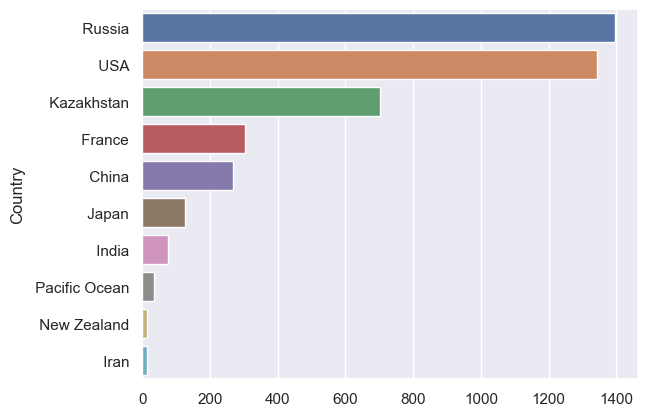

In [11]:
#Top 10 countries
country_space_race = space_race.Country.value_counts().head(10)

sns.set_theme(style="darkgrid")
sns.barplot(x=country_space_race.values, y=country_space_race.index)

In [12]:
space_race['Status Rocket'].value_counts()

Status Rocket
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [13]:
#
space_race['Day'] = space_race['Datum'].apply(lambda x:x.split()[0])


space_race['Month']=space_race['Datum'].apply(lambda x:x.split()[1])


space_race['Year'] = space_race['Datum'].apply(lambda x:x.split()[3])


space_race.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country,Day,Month,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,Fri,Aug,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Thu,Aug,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,Tue,Aug,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Thu,Jul,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,Thu,Jul,2020


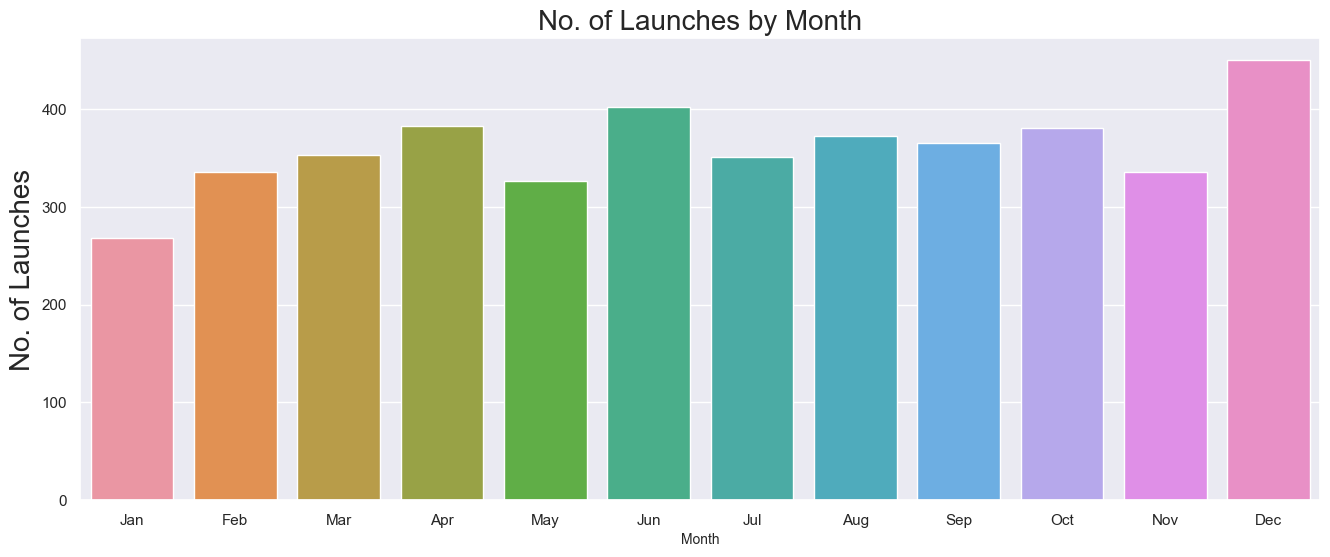

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title('No. of Launches by Month', fontsize=20)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='Month', data=space_race, order=order)
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('No. of Launches', fontsize=20)
plt.show()

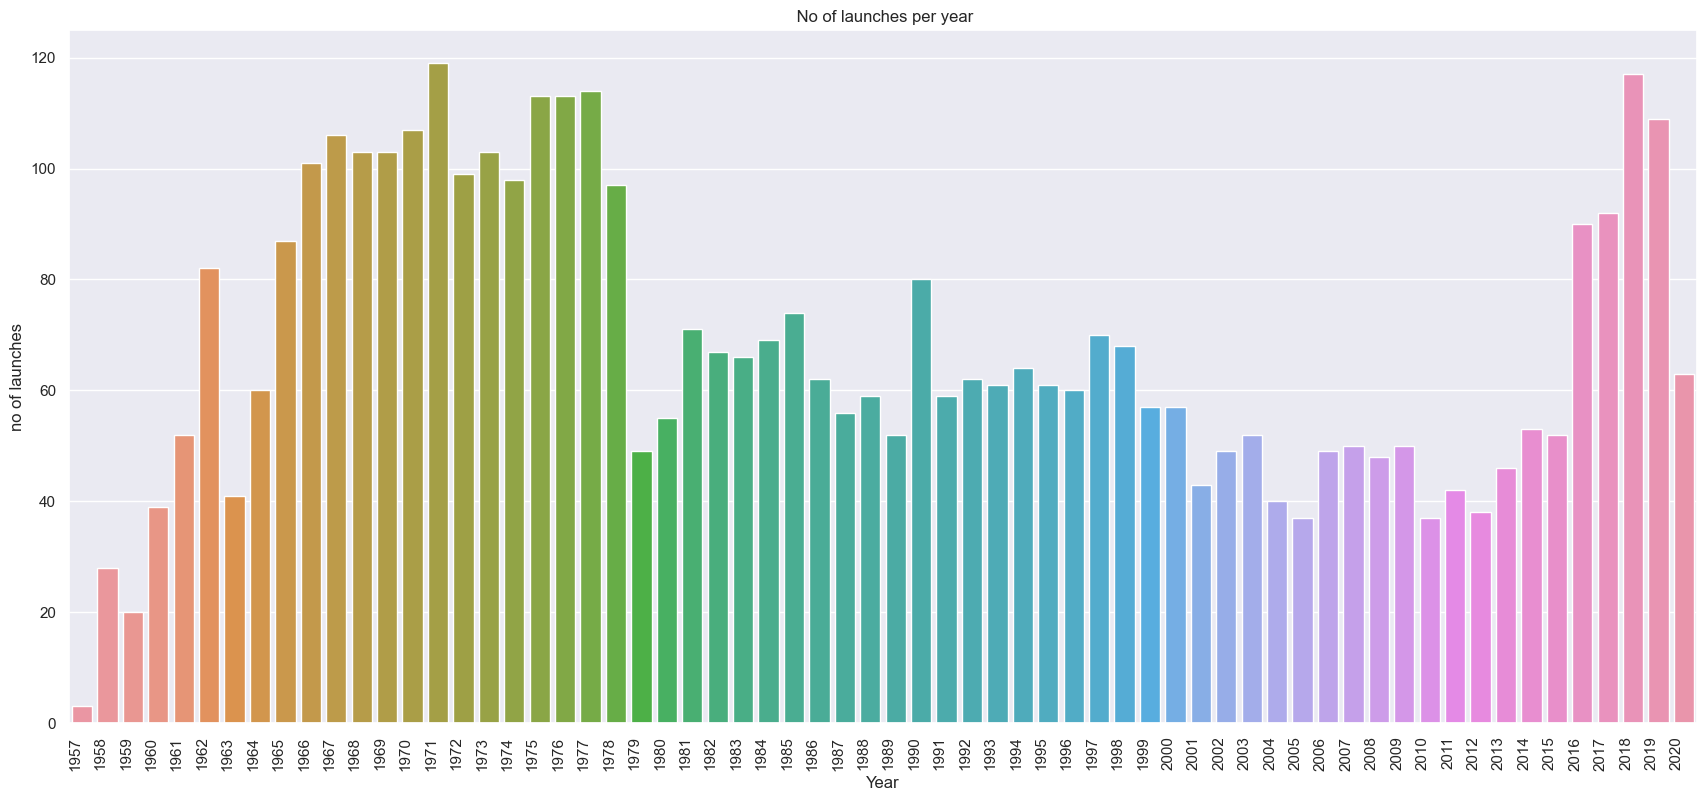

In [15]:
date= space_race.groupby('Year').count()['Detail'].reset_index()
plt.figure(figsize=(21,9))
b=sns.barplot(x='Year', y='Detail', data=date)
plt.ylabel('no of launches')
plt.title(' No of launches per year')
_=b.set_xticklabels(b.get_xticklabels(), rotation=90, horizontalalignment='right')

In [16]:
ussr=pd.DataFrame(space_race[space_race['Company Name']=='RVSN USSR'][['Status Rocket','Status Mission']].value_counts())
ussr.columns=['Count']
ussr['Percentage']=(ussr['Count']/space_race[space_race['Company Name']=='RVSN USSR'].shape[0])*100
ussr

Count  Percentage
Status Rocket Status Mission                      
StatusRetired Success             1614   90.827237
              Failure              121    6.809229
              Partial Failure       41    2.307259
              Prelaunch Failure      1    0.056275

In [17]:
spx=pd.DataFrame(space_race[space_race['Company Name']=='SpaceX'][['Status Rocket','Status Mission']].value_counts())
spx.columns=['Count']
spx['Percentage']=(spx['Count']/space_race[space_race['Company Name']=='SpaceX'].shape[0])*100
spx

Count  Percentage
Status Rocket Status Mission                      
StatusRetired Success               56        56.0
StatusActive  Success               38        38.0
StatusRetired Failure                4         4.0
              Partial Failure        1         1.0
              Prelaunch Failure      1         1.0

In [18]:
isro=pd.DataFrame(space_race[space_race['Company Name']=='ISRO'][['Status Rocket','Status Mission']].value_counts())
isro.columns=['Count']
isro['Percentage']=(isro['Count']/space_race[space_race['Company Name']=='ISRO'].shape[0])*100
isro

Count  Percentage
Status Rocket Status Mission                    
StatusActive  Success             48   63.157895
StatusRetired Success             15   19.736842
              Failure              6    7.894737
              Partial Failure      5    6.578947
StatusActive  Failure              2    2.631579

In [19]:
def plot_map(dataframe, target_column, title, width=800, height=600):
    mapspace_race = dataframe.groupby(['country', 'alpha3'])[target_column].count().reset_index()
    fig = px.choropleth(
        mapspace_race, 
        locations="alpha3", 
        hover_name="country", 
        color=target_column, 
        projection="natural earth", 
        width=width, 
        height=height, 
        title=title
    )
    fig.show()